In \[1\]:

    import tensorflow as tf
    import numpy as np
    import matplotlib.pyplot as plt

    from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
    from tensorflow.keras.models import Model

    # Load CIFAR-10 dataset
    cifar10 = tf.keras.datasets.cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Flatten label arrays
    y_train, y_test = y_train.flatten(), y_test.flatten()

    # Visualize some sample images
    fig, ax = plt.subplots(5, 5)
    k = 0
    for i in range(5):
        for j in range(5):
            ax[i][j].imshow(x_train[k])
            k += 1
    plt.show()

    # Number of classes
    K = len(set(y_train))
    print("Number of classes:", K)

    # Build the model
    i = Input(shape=x_train[0].shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(K, activation='softmax')(x)

    model = Model(i, x)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

    # Plot accuracy per iteration
    plt.plot(r.history['accuracy'], label='acc', color='red')
    plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
    plt.legend()
    plt.show()

    # Label mapping
    labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

    # Make predictions
    image_number = 0
    plt.imshow(x_test[image_number])
    n = np.array(x_test[image_number])
    p = n.reshape(1, 32, 32, 3)
    predicted_label = labels[model.predict(p).argmax()]
    original_label = labels[y_test[image_number]]
    print("Original label: {}, Predicted label: {}".format(original_label, predicted_label))

    # Save the model
    model.save('geeksforgeeks.h5')

    WARNING:tensorflow:From C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

    Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
    170498071/170498071 [==============================] - 559s 3us/step

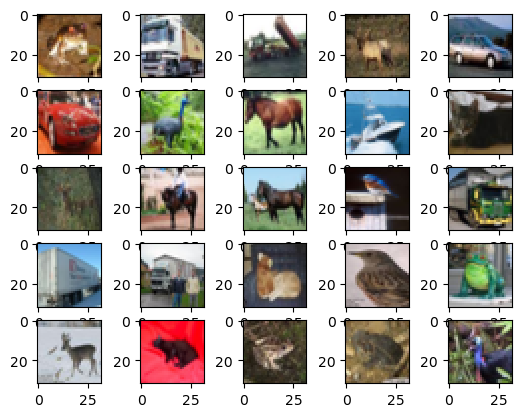

    Number of classes: 10
    WARNING:tensorflow:From C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\backend.py:1398: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.

    WARNING:tensorflow:From C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:979: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

    WARNING:tensorflow:From C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\optimizers\__init__.py:309: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

    Epoch 1/50
    WARNING:tensorflow:From C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.

    WARNING:tensorflow:From C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\engine\base_layer_utils.py:384: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.

    1563/1563 [==============================] - 134s 84ms/step - loss: 1.2996 - accuracy: 0.5525 - val_loss: 1.0938 - val_accuracy: 0.6192
    Epoch 2/50
    1563/1563 [==============================] - 133s 85ms/step - loss: 0.8404 - accuracy: 0.7103 - val_loss: 0.8321 - val_accuracy: 0.7233
    Epoch 3/50
    1563/1563 [==============================] - 129s 82ms/step - loss: 0.6888 - accuracy: 0.7637 - val_loss: 0.7447 - val_accuracy: 0.7512
    Epoch 4/50
    1563/1563 [==============================] - 134s 86ms/step - loss: 0.5788 - accuracy: 0.8012 - val_loss: 0.6634 - val_accuracy: 0.7727
    Epoch 5/50
    1563/1563 [==============================] - 139s 89ms/step - loss: 0.4937 - accuracy: 0.8319 - val_loss: 0.6220 - val_accuracy: 0.8024
    Epoch 6/50
    1563/1563 [==============================] - 141s 91ms/step - loss: 0.4152 - accuracy: 0.8581 - val_loss: 0.6382 - val_accuracy: 0.7963
    Epoch 7/50
    1563/1563 [==============================] - 139s 89ms/step - loss: 0.3455 - accuracy: 0.8808 - val_loss: 0.6445 - val_accuracy: 0.8025
    Epoch 8/50
    1563/1563 [==============================] - 135s 87ms/step - loss: 0.2987 - accuracy: 0.8976 - val_loss: 0.6309 - val_accuracy: 0.8069
    Epoch 9/50
    1563/1563 [==============================] - 181s 116ms/step - loss: 0.2517 - accuracy: 0.9125 - val_loss: 0.6470 - val_accuracy: 0.8138
    Epoch 10/50
    1563/1563 [==============================] - 233s 149ms/step - loss: 0.2193 - accuracy: 0.9255 - val_loss: 0.7034 - val_accuracy: 0.8137
    Epoch 11/50
    1563/1563 [==============================] - 232s 149ms/step - loss: 0.1953 - accuracy: 0.9331 - val_loss: 0.7032 - val_accuracy: 0.8205
    Epoch 12/50
    1563/1563 [==============================] - 228s 146ms/step - loss: 0.1734 - accuracy: 0.9417 - val_loss: 0.6888 - val_accuracy: 0.8270
    Epoch 13/50
    1563/1563 [==============================] - 231s 148ms/step - loss: 0.1566 - accuracy: 0.9462 - val_loss: 0.6894 - val_accuracy: 0.8263
    Epoch 14/50
    1563/1563 [==============================] - 229s 147ms/step - loss: 0.1443 - accuracy: 0.9511 - val_loss: 0.6663 - val_accuracy: 0.8290
    Epoch 15/50
    1563/1563 [==============================] - 230s 147ms/step - loss: 0.1287 - accuracy: 0.9568 - val_loss: 0.6859 - val_accuracy: 0.8277
    Epoch 16/50
    1563/1563 [==============================] - 231s 148ms/step - loss: 0.1235 - accuracy: 0.9579 - val_loss: 0.6723 - val_accuracy: 0.8285
    Epoch 17/50
    1563/1563 [==============================] - 235s 151ms/step - loss: 0.1123 - accuracy: 0.9623 - val_loss: 0.7825 - val_accuracy: 0.8207
    Epoch 18/50
    1563/1563 [==============================] - 236s 151ms/step - loss: 0.1087 - accuracy: 0.9631 - val_loss: 0.7848 - val_accuracy: 0.8166
    Epoch 19/50
    1563/1563 [==============================] - 190s 121ms/step - loss: 0.0998 - accuracy: 0.9675 - val_loss: 0.7504 - val_accuracy: 0.8323
    Epoch 20/50
    1563/1563 [==============================] - 136s 87ms/step - loss: 0.0952 - accuracy: 0.9690 - val_loss: 0.7133 - val_accuracy: 0.8297
    Epoch 21/50
    1563/1563 [==============================] - 134s 86ms/step - loss: 0.0899 - accuracy: 0.9711 - val_loss: 0.7351 - val_accuracy: 0.8393
    Epoch 22/50
    1563/1563 [==============================] - 131s 84ms/step - loss: 0.0896 - accuracy: 0.9699 - val_loss: 0.7123 - val_accuracy: 0.8343
    Epoch 23/50
    1563/1563 [==============================] - 128s 82ms/step - loss: 0.0798 - accuracy: 0.9737 - val_loss: 0.7777 - val_accuracy: 0.8314
    Epoch 24/50
    1563/1563 [==============================] - 133s 85ms/step - loss: 0.0799 - accuracy: 0.9733 - val_loss: 0.7397 - val_accuracy: 0.8345
    Epoch 25/50
    1563/1563 [==============================] - 130s 83ms/step - loss: 0.0724 - accuracy: 0.9753 - val_loss: 0.7091 - val_accuracy: 0.8356
    Epoch 26/50
    1563/1563 [==============================] - 130s 83ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.7327 - val_accuracy: 0.8472
    Epoch 27/50
    1563/1563 [==============================] - 130s 83ms/step - loss: 0.0727 - accuracy: 0.9761 - val_loss: 0.7585 - val_accuracy: 0.8392
    Epoch 28/50
    1563/1563 [==============================] - 126s 81ms/step - loss: 0.0641 - accuracy: 0.9786 - val_loss: 0.8330 - val_accuracy: 0.8347
    Epoch 29/50
    1563/1563 [==============================] - 127s 81ms/step - loss: 0.0675 - accuracy: 0.9778 - val_loss: 0.7607 - val_accuracy: 0.8446
    Epoch 30/50
    1563/1563 [==============================] - 128s 82ms/step - loss: 0.0599 - accuracy: 0.9809 - val_loss: 0.7989 - val_accuracy: 0.8393
    Epoch 31/50
    1563/1563 [==============================] - 129s 82ms/step - loss: 0.0632 - accuracy: 0.9793 - val_loss: 0.7687 - val_accuracy: 0.8463
    Epoch 32/50
    1563/1563 [==============================] - 123s 79ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.7693 - val_accuracy: 0.8452
    Epoch 33/50
    1563/1563 [==============================] - 217s 139ms/step - loss: 0.0555 - accuracy: 0.9818 - val_loss: 0.8673 - val_accuracy: 0.8352
    Epoch 34/50
    1563/1563 [==============================] - 130s 83ms/step - loss: 0.0544 - accuracy: 0.9824 - val_loss: 0.9220 - val_accuracy: 0.8291
    Epoch 35/50
    1563/1563 [==============================] - 748s 479ms/step - loss: 0.0536 - accuracy: 0.9821 - val_loss: 0.8438 - val_accuracy: 0.8370
    Epoch 36/50
    1563/1563 [==============================] - 129s 82ms/step - loss: 0.0539 - accuracy: 0.9823 - val_loss: 0.8081 - val_accuracy: 0.8450
    Epoch 37/50
    1563/1563 [==============================] - 130s 83ms/step - loss: 0.0526 - accuracy: 0.9825 - val_loss: 0.8899 - val_accuracy: 0.8377
    Epoch 38/50
    1563/1563 [==============================] - 5943s 4s/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.9086 - val_accuracy: 0.8332
    Epoch 39/50
    1563/1563 [==============================] - 128s 82ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.9039 - val_accuracy: 0.8378
    Epoch 40/50
    1563/1563 [==============================] - 135s 87ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.8528 - val_accuracy: 0.8450
    Epoch 41/50
    1563/1563 [==============================] - 130s 83ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.8240 - val_accuracy: 0.8267
    Epoch 42/50
    1563/1563 [==============================] - 135s 87ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.8220 - val_accuracy: 0.8390
    Epoch 43/50
    1563/1563 [==============================] - 136s 87ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.8268 - val_accuracy: 0.8406
    Epoch 44/50
    1563/1563 [==============================] - 133s 85ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.8904 - val_accuracy: 0.8342
    Epoch 45/50
    1563/1563 [==============================] - 137s 88ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.9205 - val_accuracy: 0.8389
    Epoch 46/50
    1563/1563 [==============================] - 128s 82ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.8360 - val_accuracy: 0.8399
    Epoch 47/50
    1563/1563 [==============================] - 134s 86ms/step - loss: 0.0436 - accuracy: 0.9855 - val_loss: 0.9447 - val_accuracy: 0.8425
    Epoch 48/50
    1563/1563 [==============================] - 133s 85ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 1.0269 - val_accuracy: 0.8317
    Epoch 49/50
    1563/1563 [==============================] - 133s 85ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.9304 - val_accuracy: 0.8401
    Epoch 50/50
    1563/1563 [==============================] - 149s 95ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 1.1689 - val_accuracy: 0.8218

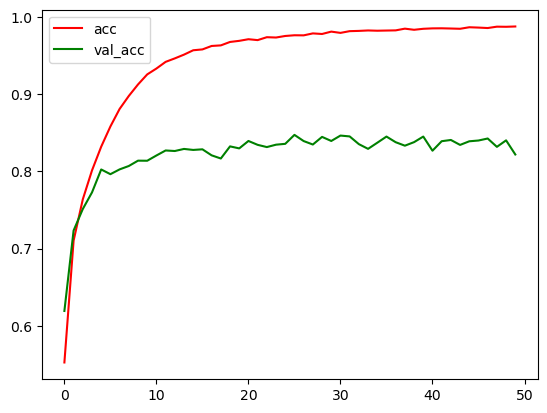

    1/1 [==============================] - 1s 1s/step
    Original label: cat, Predicted label: cat

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
      saving_api.save_model(

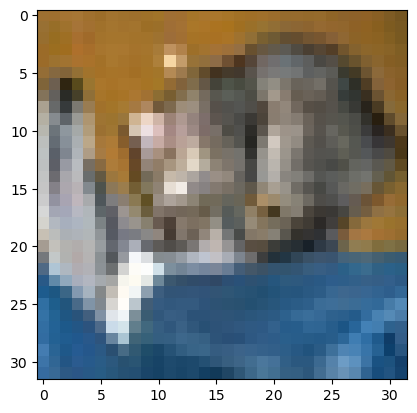

In \[ \]:

     

In \[ \]:

     

In \[ \]: